<a href="https://colab.research.google.com/github/Kiransandilya/cs666student/blob/main/sample_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

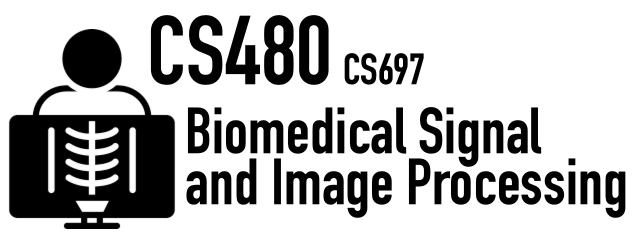
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset
from matplotlib import pyplot as plt


In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

In [ ]:
a = [[-0.245 ,1, 2], -0.125]
ecg [0:13:2]

array([-0.245, -0.185, -0.17 , -0.185, -0.16 , -0.17 , -0.22 ])

In [ ]:
firstsecond = ecg[:SAMPLING_RATE]

In [ ]:
secondsecond = ecg[1*SAMPLING_RATE:2*SAMPLING_RATE]

In [ ]:
thirdsecond = ecg[2*SAMPLING_RATE:3*SAMPLING_RATE]

In [ ]:
n2e = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE] #find the perk of this clip

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
print (ecg)
ecg.dtype
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

[-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]


dtype('float64')

(9.0, 11.0)

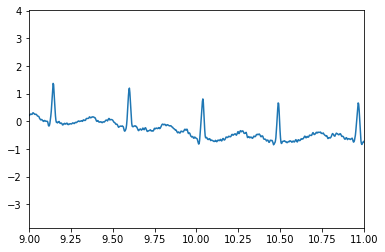

In [ ]:
time= np.arange(ecg.size) / SAMPLING_RATE
pylab.plot(time,ecg)
pylab.xlim(9,11)

In [ ]:
a = [[-0.245 ,1, 2], -0.125]
ecg [0:13:2]

array([-0.245, -0.185, -0.17 , -0.185, -0.16 , -0.17 , -0.22 ])

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE) # this is the code to find the perk

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


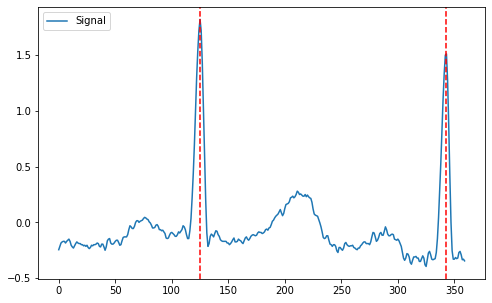

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:13]) # here only the first thirteen


[ 125  343  552  748  944 1130 1317 1501 1691 1880 2065 2251 2431]


In [ ]:
_, qwe = nk.ecg_peaks(ecg[7*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE) # this is the code to find the perk
print ( qwe)

{'ECG_R_Peaks': array([ 259,  436,  605,  772,  936, 1094, 1256, 1428, 1609]), 'sampling_rate': 360}


In [ ]:
qwe['ECG_R_Peaks']= qwe['ECG_R_Peaks'] - SAMPLING_RATE

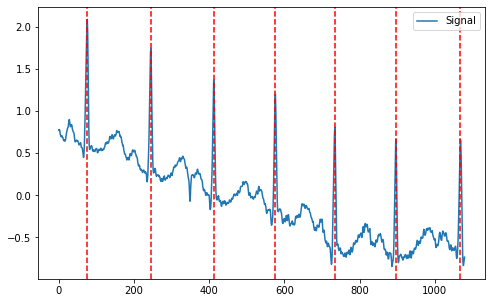

In [ ]:
plot = nk.events_plot(qwe['ECG_R_Peaks'][1:8],ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]  )
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
pip install heartpy


     |████████████████████████████████| 1.0 MB 5.2 MB/s 


In [ ]:
import heartpy as hp
heart_rate, record = hp.process(ecg, SAMPLING_RATE)
for item in record:
  print (item,":", record [item])


bpm : 103.06551628394845
ibi : 582.1539750957854
sdnn : 76.1498523954714
sdsd : 77.52620235069179
rmssd : 102.8033411674991
pnn20 : 0.6446469248291572
pnn50 : 0.4145785876993166
hr_mad : 33.33333333333337
sd1 : 72.68651515197051
sd2 : 76.06672021612641
s : 17369.943729481718
sd1/sd2 : 0.9555626290373528
breathingrate : 0.16666666666666666


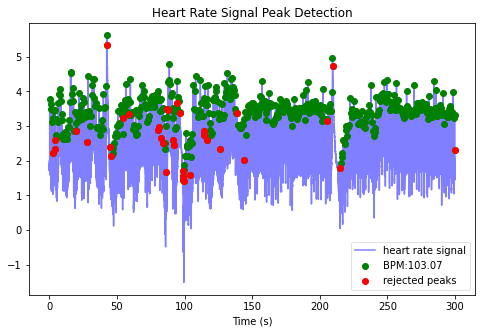

In [ ]:
hp.plotter(heart_rate, record)


We can notice that the BPM is 103.07, which is above the zone between 60-100 range BPM. This shows that the heart rate is slightly above 100 but that is very slight increase when compared to the normal heart rate.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)


In [ ]:
ecg_signal = n2e  #find the perk of this clip

In [ ]:
ecg_signal = ecg
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1200)

In [ ]:
print (rpeaks)


{'ECG_R_Peaks': array([   552,    987,   7155,  10306,  12354,  13207,  13853,  14408,
        15038,  17909,  19892,  20383,  21170,  25388,  25878,  26715,
        27566,  28485,  29168,  29830,  30936,  31353,  31816,  32819,
        33315,  33881,  34696,  35610,  36779,  37470,  38294,  38983,
        41394,  45533,  47365,  49017,  50845,  51323,  52076,  52970,
        53806,  54285,  56614,  57151,  58923,  60231,  60707,  61388,
        62015,  62409,  63245,  63761,  64389,  72829,  73282,  73810,
        74285,  75188,  77042,  77580,  78272,  78903,  79737,  80259,
        80993,  81635,  82297,  83238,  83899,  85565,  86174,  87006,
        88250,  88752,  89198,  89839,  90300,  91836,  92409,  92894,
        93608,  95099,  97056,  98848,  99256, 100221, 100993, 101483,
       102322, 102922, 104122, 104863, 107423, 107871]), 'sampling_rate': 1200}


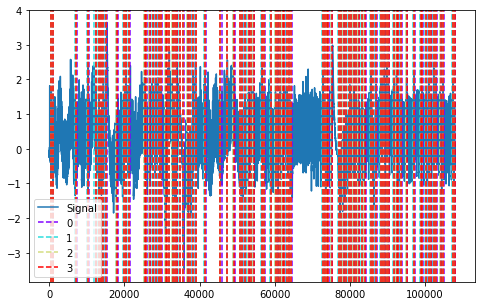

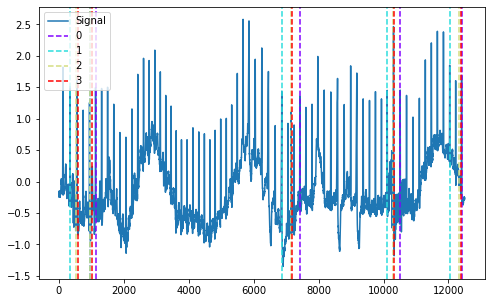

In [ ]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 5 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg_signal[:12500])







In [ ]:
# TODO Does the detection work well?


Yes, the detection went well.

In [ ]:
# Delineate the ECG signal


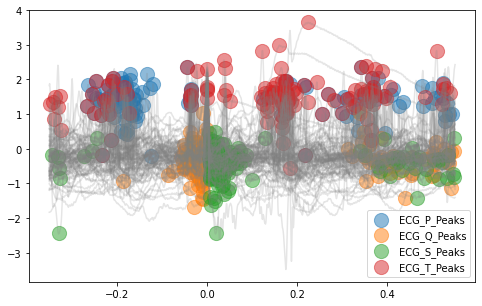

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1200, method="peak", show=True, show_type='peaks')

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.


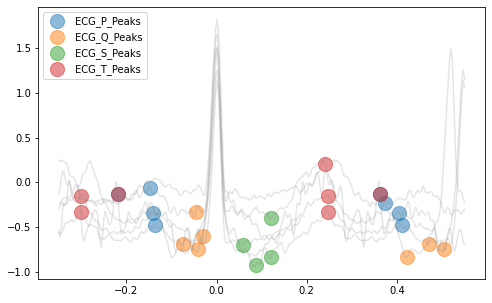

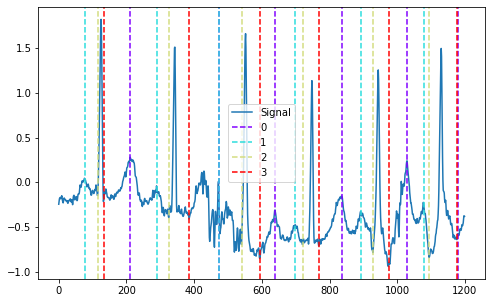

In [ ]:


# before filtering
_, rpeaks2 = nk.ecg_peaks(ecg[:1200], sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg[:1200], rpeaks2, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[:1200])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.


In [ ]:
ecg_filtered = nk.signal_filter(ecg,sampling_rate=SAMPLING_RATE, lowcut=1 , highcut=150, method="butterworth", order=2, window_size='default', powerline=50 )

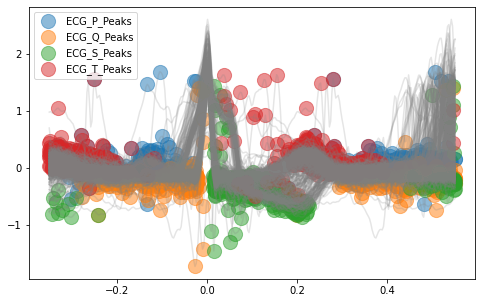

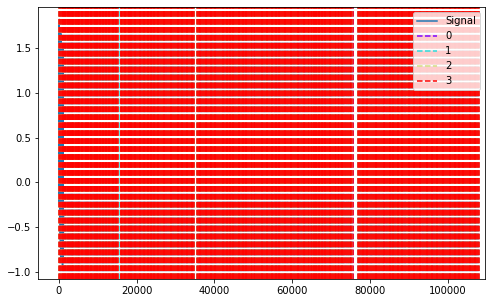

In [ ]:
_, rpeaks3 = nk.ecg_peaks(ecg_filtered, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_filtered, rpeaks3, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[:1200])

In [ ]:
# TODO Does the filtering improve the result?

Yes, the filtering gave an improved results.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#

References:
https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset

Geekforgeeks

Colloboration:
Praveen Ganni
Keerthana Reddy